In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
file_path = "insurance.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
encoder = LabelEncoder()
for col in ['sex','smoker','region']:
    df[col] = encoder.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
scaler = StandardScaler()
df[['age','bmi','children']] = scaler.fit_transform(df[['age','bmi','children']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


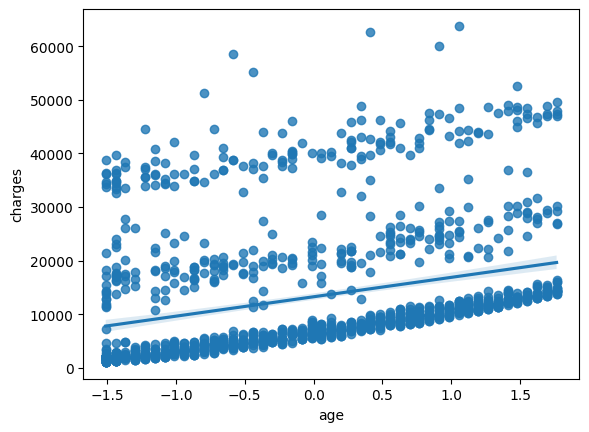

In [ ]:
sns.regplot(data = df,x='age',y='charges')
plt.show()  

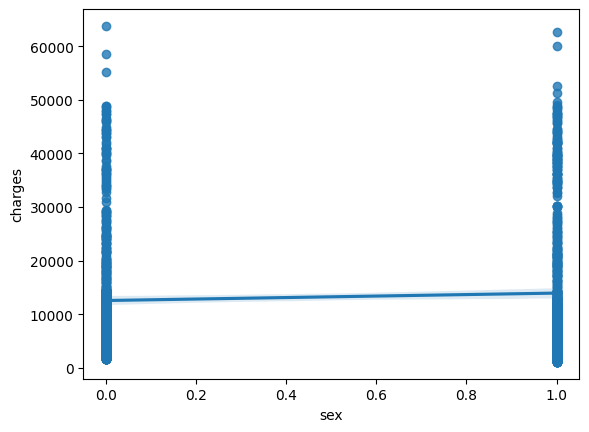

In [14]:
sns.regplot(data = df,x='sex',y='charges')
plt.show()  

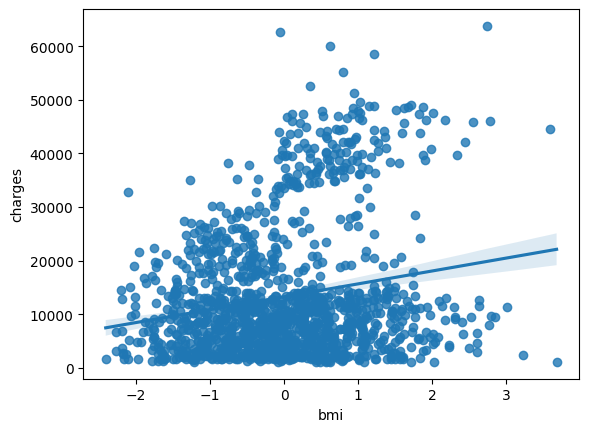

In [15]:
sns.regplot(data = df,x='bmi',y='charges')
plt.show()  

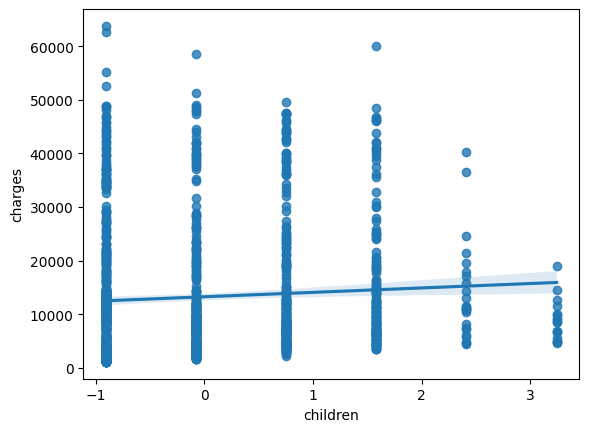

In [16]:
sns.regplot(data = df,x='children',y='charges')
plt.show()  

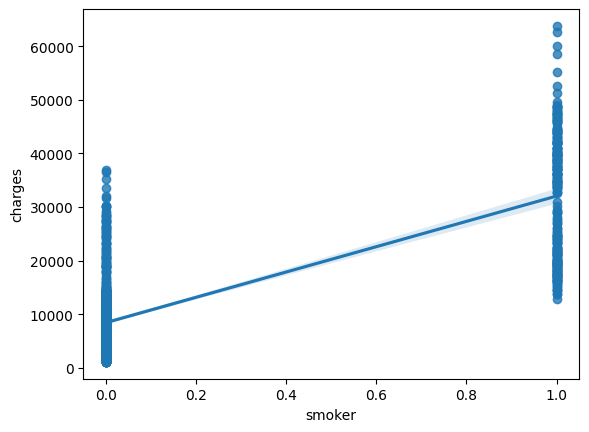

In [17]:
sns.regplot(data = df,x='smoker',y='charges')
plt.show()  

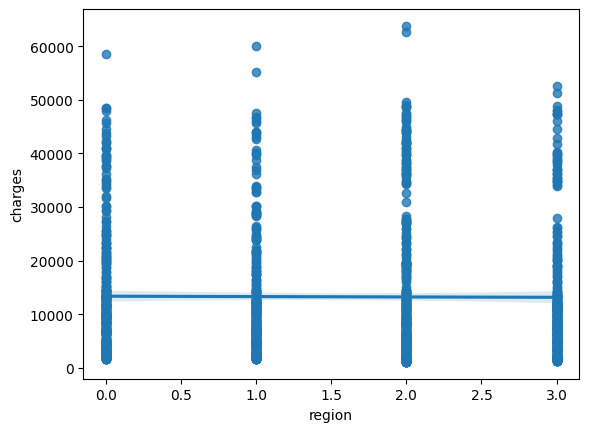

In [18]:
sns.regplot(data = df,x='region',y='charges')
plt.show()  

In [ ]:
X=df.drop(['charges'],axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [20]:
reg = LinearRegression()

In [22]:
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = reg.predict(X_test)

In [24]:
mean_absolute_error(y_test,y_pred)

3998.271540886974

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(5663.358417062195)

In [26]:
r2_score(y_test,y_pred)

0.7962732059725786

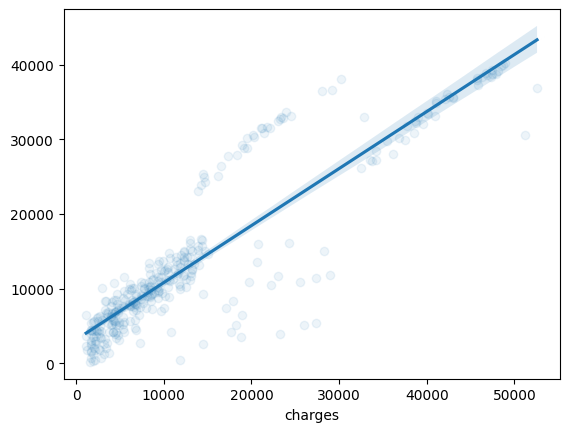

In [27]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={'alpha':0.08})
plt.show()